In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.model_selection import train_test_split

### import titanic df

In [4]:
# get titanic files as a DataFrame
titanic_dataframe = pd.read_csv("https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar1/titanic/train.csv")#, index_col='PassengerId')

#### features

In [5]:
X = titanic_dataframe.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"],axis=1)

In [6]:
Y = titanic_dataframe.Survived

In [7]:
X = pd.get_dummies(X)

In [8]:
X.fillna({'Age':X.Age.median()}, inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf_rf = RandomForestClassifier()

In [12]:
parameters = {'n_estimators':[10,20,30], 'max_depth':[2,5,7,10]}

In [13]:
grid_serch_cv_clf_rf = GridSearchCV(clf_rf, parameters, cv=5)

In [14]:
grid_serch_cv_clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [15]:
grid_serch_cv_clf_rf.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [16]:
grid_serch_cv_clf_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
best_clf = grid_serch_cv_clf_rf.best_estimator_

In [18]:
best_clf.score(X_test, y_test)

0.7966101694915254

In [19]:
best_clf.feature_importances_

array([0.10035813, 0.20447419, 0.05467526, 0.03761547, 0.23831221,
       0.21894717, 0.10529856, 0.0158459 , 0.00684968, 0.01762345])

In [20]:
feature_importances_df = pd.DataFrame({'feature':list(X_train), 'feature_importances': best_clf.feature_importances_})

In [21]:
feature_importances_df

,feature,feature_importances
0,Pclass,0.100358
1,Age,0.204474
2,SibSp,0.054675
3,Parch,0.037615
4,Fare,0.238312
5,Sex_female,0.218947
6,Sex_male,0.105299
7,Embarked_C,0.015846
8,Embarked_Q,0.006850
9,Embarked_S,0.017623


### Task 3.2

In [22]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)

rf.fit(X_train, y_train)
predictions = rf.predict(X_test)



In [23]:
rf.fit(X_train, y_train)
rf.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

### Task 3.2 Heart

In [24]:
heart_df = pd.read_csv('heart.csv')

In [25]:
X = heart_df.drop('target', axis=1)
y = heart_df.target

In [26]:
np.random.seed(0)
Heart_train, Heart_test, Target_heart_train, Target_heart_test = train_test_split(X ,y) 
rf = RandomForestClassifier(10, max_depth=5)

In [27]:
rf.fit(Heart_train, Target_heart_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rf.score(Heart_test, Target_heart_test)

0.8026315789473685

In [29]:
rf.feature_importances_

array([0.06060177, 0.0740316 , 0.16850207, 0.04565882, 0.04398643,
       0.00452443, 0.00097226, 0.10874605, 0.05920194, 0.11466218,
       0.02863123, 0.16290384, 0.12757737])

In [30]:
feature_df = pd.DataFrame({'feature':list(Heart_train), 'importance':rf.feature_importances_})

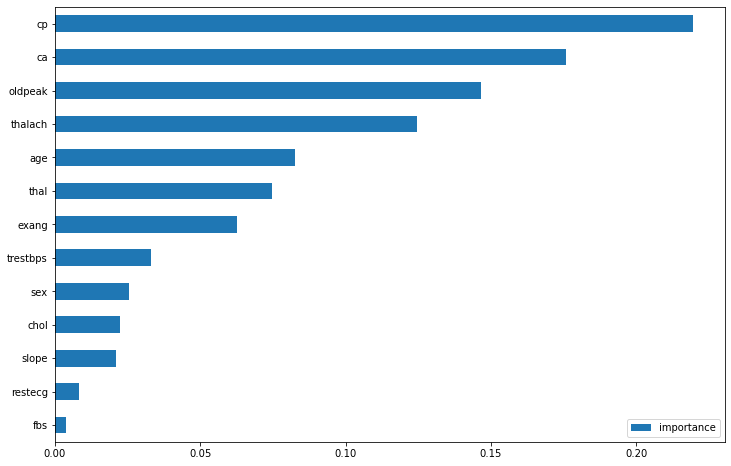

In [31]:
np.random.seed(0)
Heart_train, Heart_test, Target_heart_train, Target_heart_test = train_test_split(X ,y) 
rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X, y)

imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

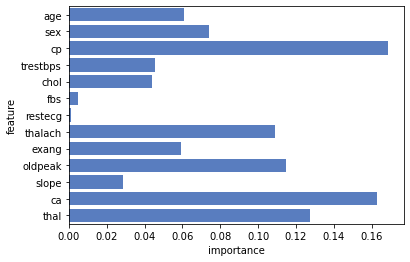

In [32]:
import seaborn as sns

sns.set_color_codes("muted")
sns.barplot(x="importance", y="feature", data=feature_df,
            label="importance", color="b")

### Task 3.5

In [33]:
fungi_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [34]:
fungi_df.rename(columns={'class':'target'}, inplace=True)
X_fungi = fungi_df.drop('target', axis=1)
y_fungi = fungi_df.target

Параметры для выбора -

    n_estimators: от 10 до 50 с шагом 10
    max_depth: от 1 до 12 с шагом 2
    min_samples_leaf: от 1 до 7
    min_samples_split: от 2 до 9 с шагом 2
    
Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [48]:
np.arange(1,8,1)

array([1, 2, 3, 4, 5, 6, 7])

In [43]:
len_range

array([10.        , 14.44444444, 18.88888889, 23.33333333, 27.77777778,
       32.22222222, 36.66666667, 41.11111111, 45.55555556, 50.        ])

In [71]:
paramaters = {'n_estimators': np.arange(10,51,10),
'max_depth': np.arange(1,13,2),
'min_samples_leaf': np.arange(1,8,1),
'min_samples_split': np.arange(2,9,2)}

In [72]:
rf = RandomForestClassifier(random_state=0)
grid_search_cv_rf = GridSearchCV(rf, paramaters, cv=3, n_jobs=-1)

In [73]:
%%time
grid_search_cv_rf.fit(X_fungi, y_fungi)

CPU times: user 14.5 s, sys: 916 ms, total: 15.4 s
Wall time: 1min 54s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [107]:
grid_search_cv_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [108]:
best_rf_fungi = grid_search_cv_rf.best_estimator_

In [109]:
best_rf_fungi.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [110]:
feature_df = pd.DataFrame({'feature':list(X_fungi), 'importance':best_rf_fungi.feature_importances_})

In [111]:
feature_df.sort_values('importance', ascending=False, inplace=True)

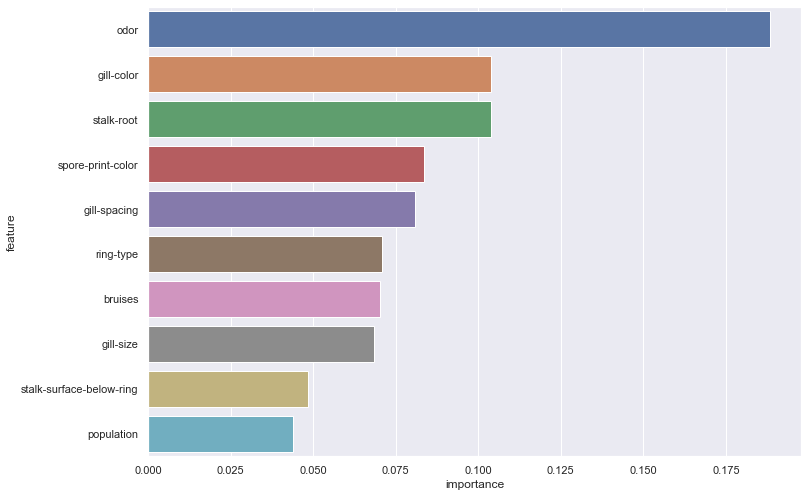

In [112]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='importance', y='feature', data=feature_df.head(10))

### Task 3.5 Fungi

In [113]:
test_series = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [116]:
predictions = best_rf_fungi.predict(test_series)

In [131]:
predictions.shape

(2031,)

In [130]:
np.count_nonzero(predictions)

976

In [118]:
fungi_pd = pd.Series(predictions)

Task Conf Matrix

In [133]:
right_fungi = pd.read_csv('testing_y_mush.csv')

In [135]:
right_fungi.shape

(2031, 1)

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [138]:
confusion_matrix(right_fungi, predictions)

array([[1055,    0],
       [   0,  976]])

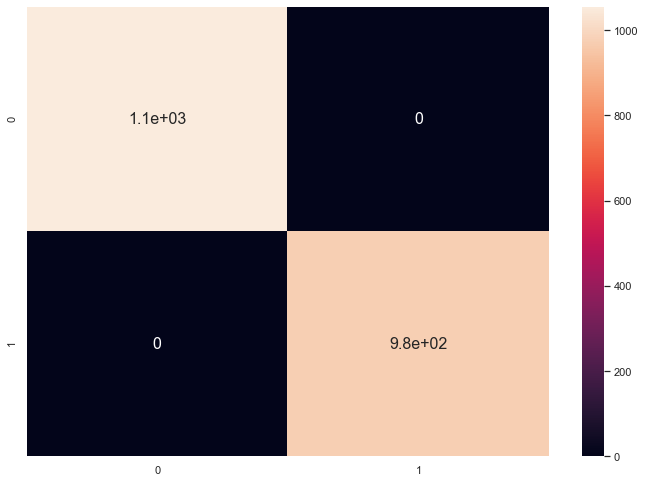

In [141]:
sns.heatmap(confusion_matrix(right_fungi, predictions), annot=True,annot_kws={"size": 16})

## Task 3.5 Jukery

In [142]:
jukery = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [152]:
#right answers
flot_jukery = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [145]:
jukery.rename(columns={'class':'target'}, inplace=True)

In [147]:
jukery.target.unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [148]:
X_juker = jukery.drop('target', axis=1)
y_juker = jukery.target

In [149]:
paramaters = {'n_estimators': np.arange(10,31,10),
'max_depth': np.arange(1,13,2),
'min_samples_leaf': np.arange(1,8,1),
'min_samples_split': np.arange(2,9,2)}
rf = RandomForestClassifier(random_state=0)
grid_search_cv_rf = GridSearchCV(rf, paramaters, cv=3, n_jobs=-1)

In [151]:
%%time
grid_search_cv_rf.fit(X_juker, y_juker)

CPU times: user 3.24 s, sys: 90.1 ms, total: 3.33 s
Wall time: 27.6 s


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [154]:
best_clf_jukery = grid_search_cv_rf.best_estimator_

In [155]:
grid_search_cv_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [163]:
predicted_jukery = best_clf_jukery.predict(flot_jukery)

In [165]:
jukery_pd = pd.Series(predicted_jukery)

In [166]:
jukery_pd.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [168]:
jukery_fi_df = pd.DataFrame({'feature':list(X_juker), 'importance':best_clf_jukery.feature_importances_})

In [175]:
jukery_fi_df.sort_values('importance', ascending=False)

,feature,importance
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


Task 3.5 region research 

In [176]:
region_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [178]:
region_df.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


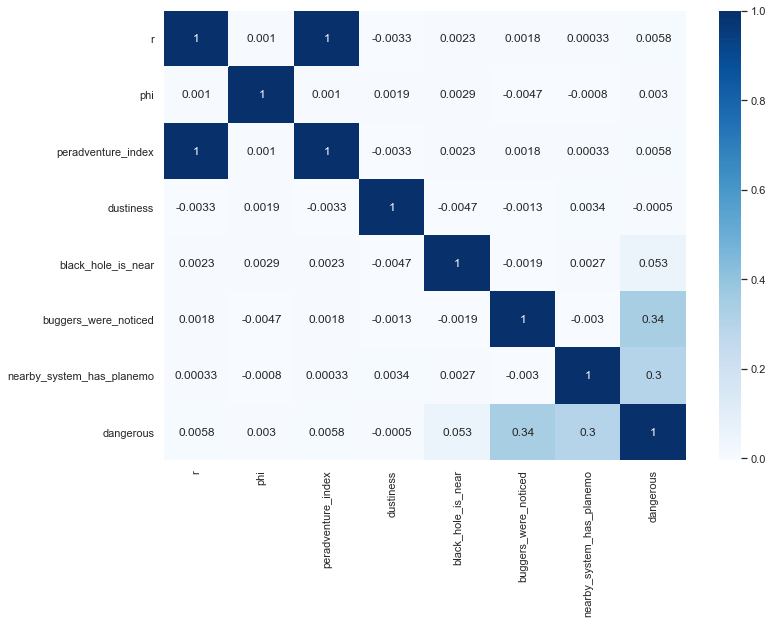

In [185]:
sns.heatmap(region_df.corr(), annot=True, cmap=plt.cm.Blues)